In [1]:
# Import/export structure assumes you run this from same directory as this notebook 
# from the included conda (.yml) environment
import src.folders as folders
import src.config as config
import src.plots as plots
import src.core as core
import pandas as pd
import os

# Construct master dataframe (long-form)

Cell below creates a master dataframe containing almost all data in long format, which is also stored in */exports/pdp1_data_master.csv*. Columns:
- pID: participant ID 
- tp: timepoint 
- test: name of test
- measure: outcome measure of a given test. Same as test if test has single outcome measure 
- score: score measured
- delta_score: difference from baseline value if baseline is defined for measure, included for convenience

In [2]:
core.Controllers.get_master_df()

,pID,tp,test,measure,score,delta_score
0,1002,A7,MTS,MTSCFAPC,100.0,0.0
1,1002,A7,MTS,MTSPS82,1229.8,-1253.5
2,1002,A7,MTS,MTSRCAMD,2590.5,-305.5
3,1002,A7,MTS,MTSRFAMD,2590.5,-305.5
4,1002,A7,OTS,OTSMDLFC,12391.0,-4839.0
...,...,...,...,...,...,...
2438,1145,B30,TSQ,tsqp_2,7.0,NaN
2439,1145,B30,TSQ,tsqp_3,5.0,NaN
2440,1145,B30,TSQ,tsqp_4,7.0,NaN
2441,1145,B30,TSQ,tsqp_5,7.0,NaN


### Tables of observed means and SDs

Means and SD are concatanated into single cell for later convenience

In [4]:
core.Analysis.observed_scores_df(
    df=pd.read_csv(os.path.join(folders.exports, 'pdp1_data_master.csv')),)

,index,measure,tp,obs
0,0,UPDRS_1,A7,11.2±3.2
1,0,UPDRS_1,B30,7.7±3.3
2,0,UPDRS_1,B7,7.9±2.6
3,0,UPDRS_1,bsl,21.4±5.6
4,0,UPDRS_2,A7,11.2±5.3
...,...,...,...,...
63,0,RTIFMDRT,bsl,384.9±65.9
64,0,RTISMDRT,A7,335.7±74.4
65,0,RTISMDRT,B30,331.6±57.8
66,0,RTISMDRT,B7,336.2±71.3


# Mixed models and Friedman test

Now we are ready for the main analysis, i.e. running the mixed effect models or the Friedman tests.
These are implemented in R, see code in /pdp1 R models/.
- Mixed effects models are calculated by *pdp1_mixed_models.r* and results are stored in */exports/pdp1_mixed_models.csv*
- Friedman tests are calculated by *pdp1_friedman_models.r* and results are stored in */exports/pdp1_friedman_main.csv* and */exports/pdp1_friedman_pairwise.csv* for the omnibus, pairwise tests, respectively.

In the mixed effect files significant marking are as usual: \* if 0.01 <= p < 0.05; \** if 0.001 <= p < 0.01 and \*** if p < 0.001 (significance mark is NaN if p>=0.05). *adj.p.value* / *adj.sig* are the adjusted p-values / significane markings after adjusting for multiple comparisons with Bonferroni method.

In [6]:
pd.read_csv(os.path.join(folders.exports, 'pdp1_mixed_models.csv'))

,measure,tp,est,SE,hedges.g,df,t.value,p.value,sig,adj.p.value,adj.sig
0,UPDRS_1,(Intercept),21.42,1.11,NaN,35.0,19.36,<0.001,***,<0.001,***
1,UPDRS_1,tp(A7),-10.25,1.32,-2.26,33.0,-7.79,<0.001,***,<0.001,***
2,UPDRS_1,tp(B7),-13.50,1.32,-3.09,33.0,-10.26,<0.001,***,<0.001,***
3,UPDRS_1,tp(B30),-13.75,1.32,-3.01,33.0,-10.45,<0.001,***,<0.001,***
4,UPDRS_2,(Intercept),15.83,1.62,NaN,14.3,9.74,<0.001,***,<0.001,***
...,...,...,...,...,...,...,...,...,...,...,...
143,SWMBE8,tp(B30),-0.50,1.73,-0.09,33.0,-0.29,0.775,NaN,1.000,NaN
144,SWMS,(Intercept),8.67,0.87,NaN,17.6,9.94,<0.001,***,<0.001,***
145,SWMS,tp(A7),-0.92,0.67,-0.33,33.0,-1.37,0.180,NaN,1.000,NaN
146,SWMS,tp(B7),-1.50,0.67,-0.51,33.0,-2.24,0.032,*,0.222,NaN


# Plots 

Next, lets visualize the time evolution of individual/mean scores. Plots are not displayed in python, rather saved as PNGs and SVGs, because separate plot is created for all outcome measures, lots of figures. 
The important plots are:
- Time evolution of individual's scores
- Time evolution of aggregated scores

In [2]:
# Make time evolution of individual's scores plots
plots.Controllers.make_ind_timeevols(
    df = pd.read_csv(os.path.join(folders.exports, 'pdp1_data_master.csv')),
    out_dir=folders.tmp, #folders.ind_timeevols,
    save=True)

# Make time evolution of aggregated scores
plots.Controllers.make_agg_timeevols(
    df = pd.read_csv(os.path.join(folders.exports, 'pdp1_data_master.csv')),
    out_dir=folders.tmp, #folders.ind_timeevols,
    save=True)

# Analysis of vitals during drug sessions 

Cell below creates the dataframe for vitals data. Vitals data are stored in a separate dataframe because it has the added dimension of time, i.e. how many minutes after dosing the measurement was taken.
Same as '/exports/pdp1_data_vitals.csv'
The measures are:
- 'dia': diastolic  blood pressure in mmHg
- 'sys': systolic blood pressure in mmHg
- 'hr': heart rate in beats per minute
- 'temp': body temperature in C

In [5]:
core.Controllers.get_vitals_df()

,pID,tp,score,time,measure
0,1002,A0,72.67,0,dia
1,1002,B0,69.67,0,dia
2,1020,A0,73.30,0,dia
3,1020,B0,72.00,0,dia
4,1034,A0,52.67,0,dia
...,...,...,...,...,...
763,1129,B0,36.10,420,temp
764,1142,A0,36.05,420,temp
765,1142,B0,35.89,420,temp
766,1145,A0,36.27,420,temp


Lets make paired t-tests and Wilcoxon matched pairs to compare vitals data across the 10mg and the 25mg sessions. 
We have two analysis:
- One where the averages values are compared
- One where the maximum change from baseline is compared

In [2]:
# Analysis with max change 
# t / t.p: t-value and p-value of t-test
# w / w.p: w-value and p-value of Wilcoxon test
core.Analysis.vitals_dmax(
    df=pd.read_csv(
        os.path.join(folders.data, 'pdp1_vitals.csv')),)

C:\Users\szb37\miniconda3\envs\pdp\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,measure,t,t.p,w,w.p,A0_deltamax_mean,B0_deltamax_mean
0,dia,-1.323,0.2128,19.0,0.1294,-5.27,2.47
1,hr,-2.532,0.0279,10.0,0.0210,-7.58,2.75
2,sys,-1.250,0.2371,20.0,0.1514,12.86,22.83
3,temp,-0.337,0.7426,38.0,0.9687,0.15,0.25


In [3]:
# Analysis with max change 
# t / t.p: t-value and p-value of t-test
# w / w.p: w-value and p-value of Wilcoxon test
core.Analysis.vitals_avg(
    df=pd.read_csv(
        os.path.join(folders.data, 'pdp1_vitals.csv')),)

,measure,t,t.p,w,w.p,A0_avg,B0_avg
0,dia,-2.228,0.0477,16.0,0.0771,75.04,77.06
1,hr,-2.713,0.0202,10.5,0.0210,69.19,73.09
2,sys,-3.391,0.0060,6.0,0.0068,129.48,134.60
3,temp,-0.075,0.9417,36.5,0.8501,36.22,36.23


### Visualisation of vitals

These plots are same as in 'exports/vitals/'

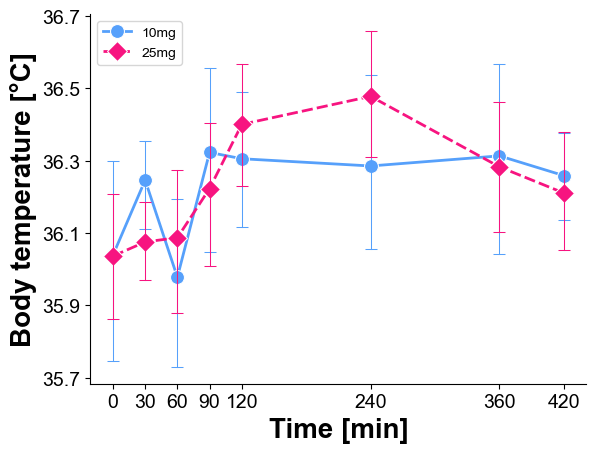

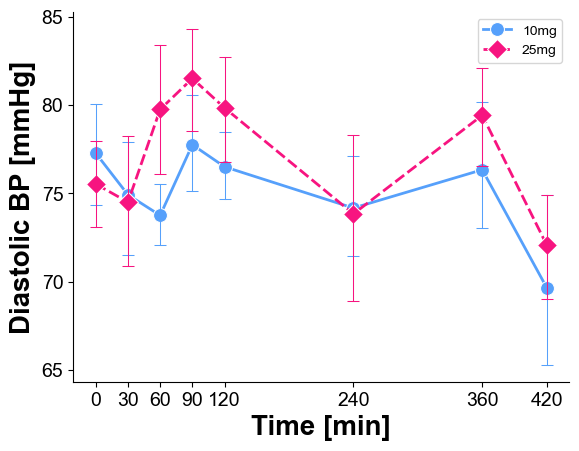

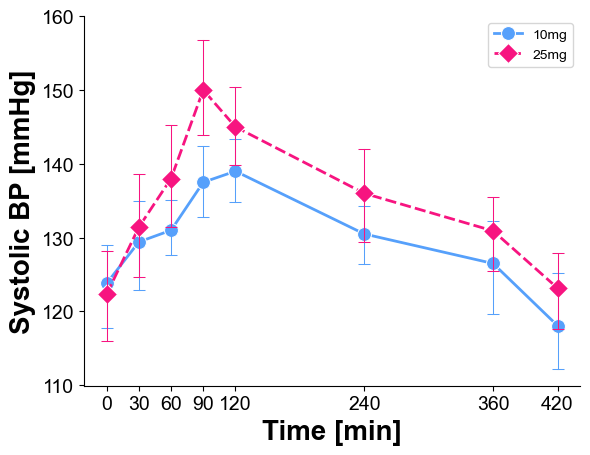

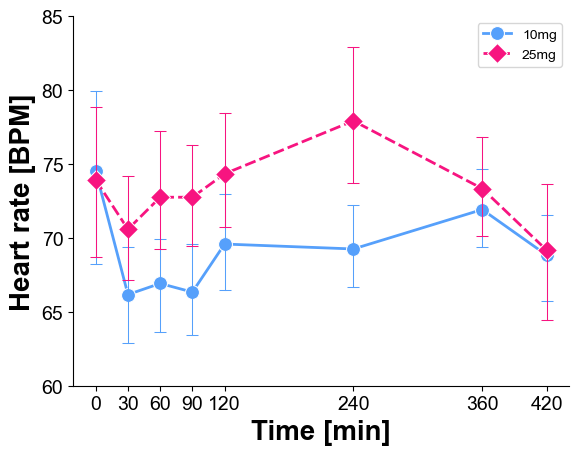

In [2]:
plots.Controllers.make_vitals(df=pd.read_csv(os.path.join(folders.data, 'pdp1_vitals.csv')),)

# Analysis of 5DASC scores

Lets make paired t-tests / Wilcoxon paired sample and than make bar-plot comparison.
'MEAN' is the mean value across all the other 11 dimensions. 

In [2]:
# t / t.p: t-value and p-value of t-test
# w / w.p: w-value and p-value of Wilcoxon test
core.Analysis.fivedasc_pairedt(
    df=pd.read_csv(
        os.path.join(folders.data, 'pdp1_5dasc.csv')),)

C:\Users\szb37\miniconda3\envs\pdp\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,measure,t,t.p,w,w.p
0,unity,-0.785,0.4489,20.0,0.4446
1,spirit,-1.716,0.1141,17.0,0.1549
2,bliss,-0.976,0.3498,32.5,0.6221
3,insight,-0.407,0.6921,33.0,1.0000
4,disem,-1.471,0.1694,19.0,0.1294
5,impcc,0.340,0.7405,27.0,0.3804
6,anx,-0.943,0.3661,23.0,0.3739
7,cimg,-0.771,0.4570,14.0,0.0522
8,eimg,-0.452,0.6603,29.0,0.4697
9,avs,-0.443,0.6663,37.0,0.9097


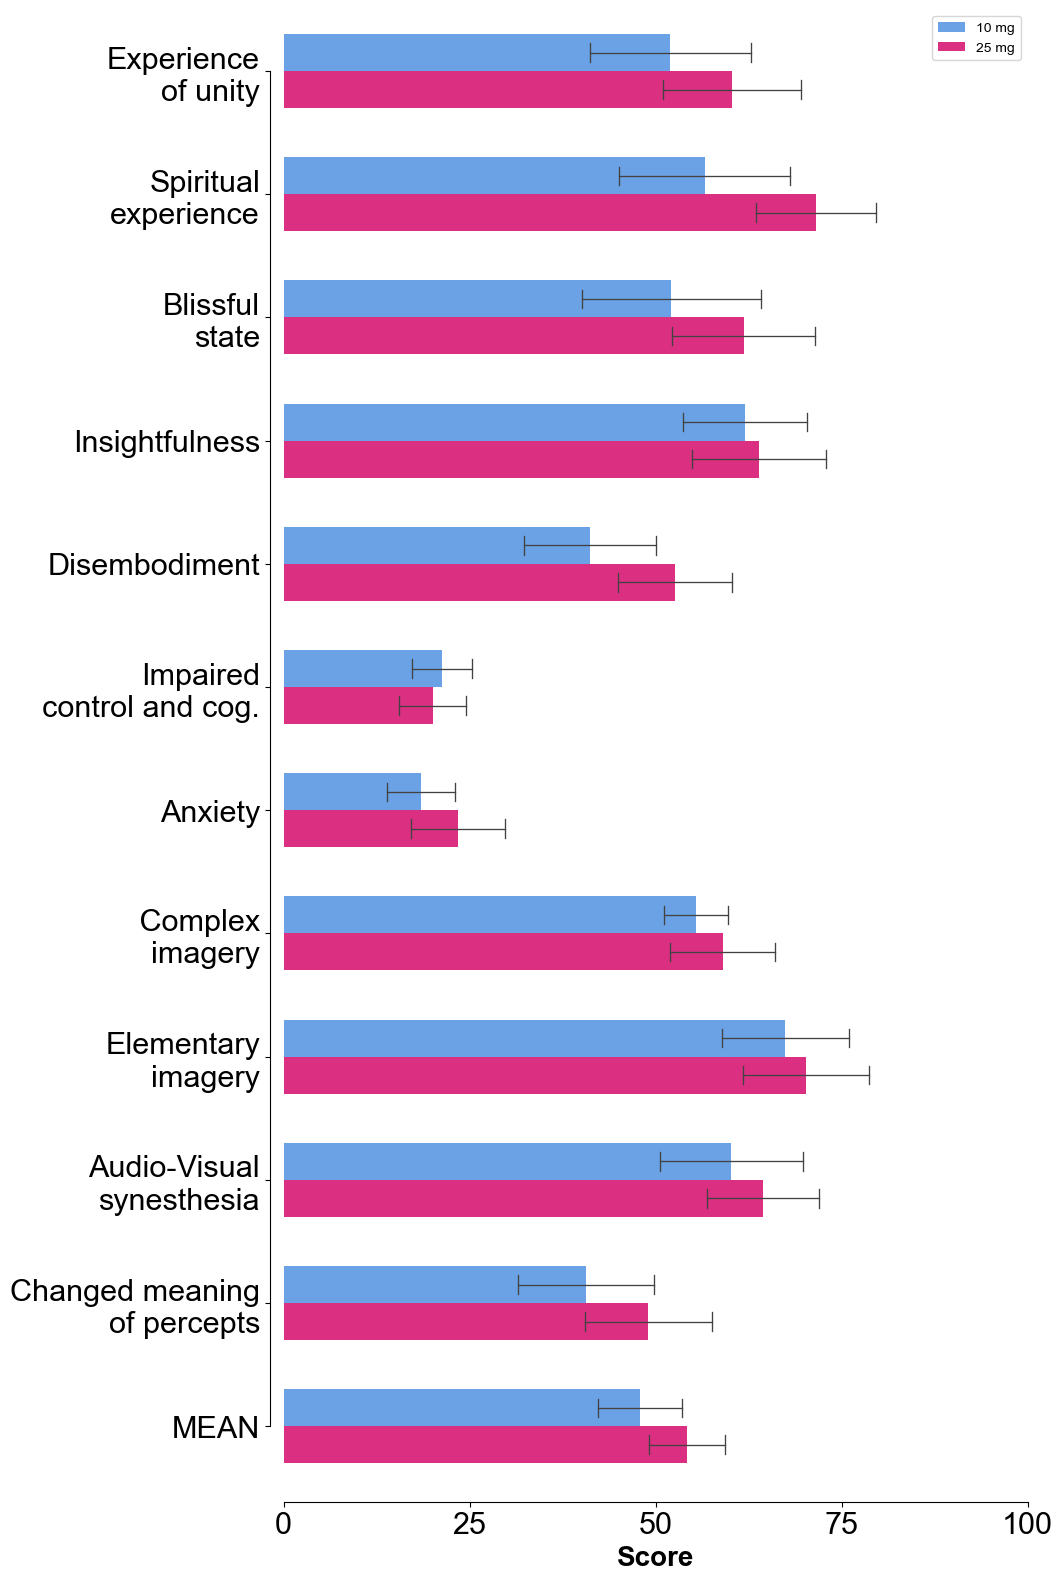

In [3]:
plots.Controllers.make_5dasc(
    df=pd.read_csv(os.path.join(folders.data, 'pdp1_5dasc.csv')),
    out_dir=folders.fivedasc,)

# Treatment satisfaction

Finally, lets visualize treatment satisfaction

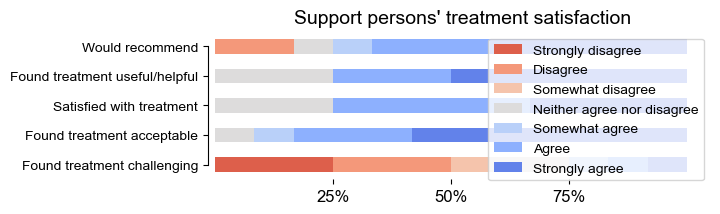

In [2]:
plots.Controllers.make_tsq(
    df=pd.read_csv(os.path.join(folders.data, 'pdp1_tsq.csv')),
    out_dir=folders.tsq)